<h1 style="text-align:center;">DRUGI PROJEKAT</h1>

<h2 style="font-style:italic; font-weight:bold; text-align: center;">
    Online Retail & E-Commerce Dataset
</h2>


## 1. Uvod u klasterizaciju (nenagledano učenje)
Klasterizacija je metoda nenagledanog učenja čiji je cilj da se podaci grupišu u homogene grupe (klastere) na osnovu njihove sličnosti, bez prethodno definisanih oznaka (labela). Za razliku od klasifikacije, gde su klase poznate unapred, u klasteizaciji algoritam sam otkriva strukturu podataka.

### Najčešće korišćeni algoritmi klasterizacije:
#### 1. K-Means
- Jedan od najpopularnijih algoritama.
- Zahteva unapred zadat broj klastera **k**.
- Cilj: minimizirati ukupno rastojanje tačaka od centra klastera.
- Predosti: brz, jednostavan, dobro radi na velikim skupovima.

#### 2. Hierarchical Clustering (Hijerarhijska  klasterizacija)
- Gradi hijerarhiju klastera (stablo - dendrogram).
- Ne zahteva unapred zadat broj klastera.
- Može biti:
  - aglomerativna (spajanje klastera)
  - divisivna (razdvajanje klastera)

#### 3. DBSCAN
- Ne zahteva broj klastera unapred.
- Može da detektuje outliere "šum".
- Dobro radi sa klasterima proizvoljnog oblika.
- Mana: osetljiv na izbor parametara.

U ovom projektu ćemo kasnije isprobati više ovih pristupa i uporediti rezultate.

Cilj ovog projekta je da se na izabranom E-Commerce datasetu primene rayli;iti algoritmi klasteriyacije, uporede njihovi rezultai, analizira kvalitet dobijenih klastera, kao i da se razmotre tehnike pripreme podataka, redukcije dimenyionalnosti i obrade outliera.

U kontekstu e-commerce podataka, klasterizacija se može koristiti za segmentaciju kupaca, analizu ponašanja potrošača ili identifikaciju sličnih transakcija.

## 2. Izbor i opis skupa podataka
Za projakat je izabran dataset: [Online Retail & E-Commerce Dataset](https://www.kaggle.com/datasets/ertugrulesol/online-retail-data)

Međutim, u ovom radu se koristi **sintetička verzija tog skupa podataka** pod nazivom `synthetic_online_retail_data.csv`.

Sintetička verzija dataseta izabrana je radi lakše obrade i fokusirana na primenu algoritama klasterizacije.

Ovaj dataset sadrži simulirane podatke o online kupovinama i pripada oblasti *E-Commerce Services*.

### Opis podataka:
Dataset sadrži informacije o:
- customer_id - kategorijska promenljiva (identifikator kupca)
- product_id - kategorijska promenljiva (identifikator proizvoda)
- quantity - numerička promenljiva (broj kupljenih proizvoda)
- price - numerička promenljiva (cena po jedinici) 
- review_score - numerička promenljiva (ocena proizvoda od 1 do 5)
- age - numerička promenljiva (starost kupca)

Ove karakteristike omogućavaju primenu klasterizacionih algritama za grupisanje kupaca prema njihovom ponašanju u kupovini.

### Problem koji želimo da istražimo:
Cilj projekta biće da pomoću klasterizacije 
- identifikujemo različite tipove kupaca.
- analiyiramo obrasce kupovine
- otkrijemo grupe kao što su:
  - česti kupci
  - veliki potrošači
  - povremeni kupci
  - kupci sa malim budžetom
  - ili kupci koji ostavljaju niske ocene

## Priprema podataka i deskriptivna analiza 

### Učitavanje podataka

In [1]:
import pandas as pd
#učitavanje podataka
df = pd.read_csv("synthetic_online_retail_data.csv", encoding="ISO-8859-1")
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


### Osnovni pregled podataka

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


Dataset sadrži 1000 zapisa (transakcija) i 13 atributa. Većina numeričkih kolona (quantity, price, age) nema nedistajučih vrednosti. Međutim, u kolonama review_score i gende postoje nedostajuće vrednosti (NaN), što zahteva dodatnu obradu pre klasterizacije.

### Provera nedostajućih vrednosti

In [3]:
df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

Proverom nedostajučih vrednosti uočeno je da kolone review_score i gender sadrže NaN vrednosti dok ostale kolone imaju nedostajuće podatke. Zbog toga je neophodno izvršiti njihovu obradu pre primene algoritama klasterizacije.

In [4]:
df['review_score'] = df['review_score'].fillna(df['review_score'].mean())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

Nedostajuće vrednosti u review_score su popunjene prose;nom ocenom, dok su nedostajuće vrednosti u gender zamenjene najčešćom vrednošću (modus).

In [5]:
df.isnull().sum()

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

### Kreiranje nove promenljive

In [6]:
df["TotalPrice"] = df["quantity"] * df["price"]

In [7]:
df[['quantity','price','TotalPrice']].head()

,quantity,price,TotalPrice
0,2,373.36,746.72
1,5,299.34,1496.70
2,5,23.00,115.00
3,2,230.11,460.22
4,4,176.72,706.88


Kreirana je nova promenljiva TotalPrice koja predstavlja ukupnu vrednost jedne kupovine, dobijena množenjem količine (quantity) i cene po jedinici (price). Ova varijabla će biti korisna za analizu potrošačkog ponašanja i kasniju klasterizaciju kupaca.

### Osnovna statistika


In [8]:
df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age,TotalPrice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000,737.326880
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.107783,16.569992,566.404843
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000,20.840000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.992491,32.000000,285.837500
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000,592.785000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000,1081.040000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000,2437.650000


Tumačenje osnovne statistike:
- `quantity` se kreće od 1 do 5, sa prosekom oko 2.95, što znači da kupci uglavnom kupuju male količine po transakciji
- `price` varira od približno 10 do 500, što ukazuje na širok raspon cena proizvoda
- `review_score` ima vrednosti od 1 do 5, sa prosekom 4, što sugeriše da su kupci uglavnom zadovoljni
- `age` kupaca se kreće od 18 do 75 godina, sa prosekom oko 46, što pokazuje da dataset obuhvata širok raspon starosnih grupa"
- `TotalPrice` varira od oko 20 do 2437, što pokazuje da postoje i mali i veoma veliki izdaci po kupovini.

### Vizuelizacija distribucije potrošnje

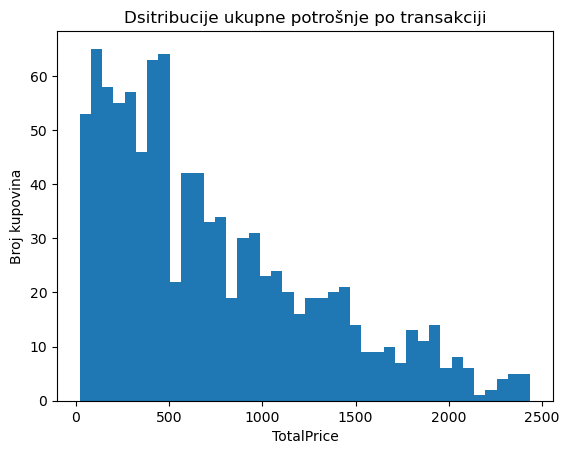

In [9]:
import matplotlib.pyplot as plt

plt.hist(df["TotalPrice"], bins = 40)
plt.title("Dsitribucije ukupne potrošnje po transakciji")
plt.xlabel("TotalPrice")
plt.ylabel("Broj kupovina")
plt.show()

Tumačenje distribucije TotalPrice:
- Distribucija ukuone potrošnje po transakciji je desno asimetrična što znači da većina kupovina ima manju vrednost, dok postoji manji broj veoma skupoh transakcija.
- Najveći broj transakcija se nalazi u opsegu približno 0-500
- Kako TotalPrice raste, broj transakcija opada, što ukazuje na postojanje potencijalnih outliera (izuzetno visokih vrednosti potrošnje).

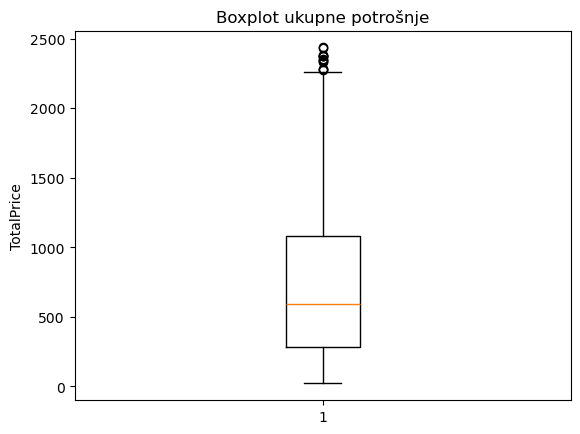

In [10]:
plt.boxplot(df["TotalPrice"])
plt.title("Boxplot ukupne potrošnje")
plt.ylabel("TotalPrice")
plt.show()

Boxplot pokazuje prisustvo nekoliko ekstremnih vrednosti TotalPrice, što potvrđuje postojanje outliera u podacima.

### Zaključak pripreme podataka
Nakon pregleda i analize podataka:
- Nema kritičnih nedostajučih vrednosti.
- Kreirana je nova promenljiva **TotalPrice = quantity * price**, koja bolje opisuje potrošnju po transakciji
- Vizuelizacija podataka (histogrami i boxplot) ukazala je na postojanje potencijalnih outliera u ukupnoj potrošnji
- Podaci su spremni za agregaciju po kupcu i klasterizaciju.

U narednom koraku ćemo: 
- grupisati podatke po kupcu
- skalirati ih
- i primeniti algoritme za klasterizaciju

## Klasterizacija podataka i poređenje rezultata
Cilj ovog dela projekta je da:
- primenimo više algoritama za klasterizaciju
- dobijemo grupe (klastere) kupaca,
- i uporedimo kvalitet dobijenih klastera pomoću odgovarajučih metrika

Koristićemo tri pristupa
1. K-Means
2. Hijerarhijsku klasterizaciju
3. DBSCAN

Za poređenje kvaliteta klastera koristićemo:
- Silhouette Score 
- Broj  klastera
- Broj outlier-a (za DBSCAN)

Pre klasterizacije moramo agregirati podatke po kupcu i skalirati numeričke varijable, jer algoritmi poput K-Means-a zavise od skale podataka.

### Agregacija podataka po kupcu

In [11]:
customer_data = df.groupby("customer_id").agg({
    "product_id": "count",
    "quantity" : "sum",
    "TotalPrice": "sum",
    "review_score": "mean",
    "age": "mean"
}).reset_index()

customer_data.rename(columns = {
    "product_id": "NumPurchases",
    "quantity" : "TotalQuantity",
    "TotalPrice": "TotalSpending",
    "review_score": "AvgReview",
    "age": "Age"
}, inplace = True)

customer_data.head()

,customer_id,NumPurchases,TotalQuantity,TotalSpending,AvgReview,Age
0,10201,1,4,624.84,3.992491,23.0
1,10211,1,2,65.02,5.000000,25.0
2,10254,1,1,70.93,3.000000,73.0
3,10299,1,4,815.76,5.000000,33.0
4,10403,1,5,1319.35,3.992491,65.0


Podaci su agregirani na nivou kupca (customer_id) kako bi svaki red predstavljao jednog kupca, što je neophodno za klasterizaciju. Za svakog kupca izračunate su sledeće karakteristike:
- `NumPurchases` - ukupan broj kupovina,
- `TotalQuantity` - ukupna količina kupljenih proizvoda
- `TotalSpending` - ukupna potrošnja
- `AvgReview` - prosečna ocena proizvoda
- `Age` - starost kupca

### Skaliranje podataka

In [12]:
from sklearn.preprocessing import StandardScaler

X = customer_data [["NumPurchases", "TotalQuantity", "TotalSpending", "AvgReview", "Age"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,NumPurchases,TotalQuantity,TotalSpending,AvgReview,Age
0,0.0,0.745293,-0.198697,0.000000,-1.411811
1,0.0,-0.670269,-1.187566,0.909938,-1.291051
2,0.0,-1.378050,-1.177127,-0.896374,1.607202
3,0.0,0.745293,0.138545,0.909938,-0.808009
4,0.0,1.453075,1.028089,0.000000,1.124160


Numeričke varijable su skalirane pomću StandardScaler kako bi sve bilo na istoj skali (srednja vrednost 0, standardna devijacija 1). Ovo je neophodno jer algoritmi poput K-Means-a zavise od rastojanja između tačaka, pa bi bez skaliranja promenljive sa velim vrednostima (TotalSpending) dominirale nad ostalima.

### K-Means

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score

sil_scores

{2: np.float64(0.27232205177524915),
 3: np.float64(0.2782647557363149),
 4: np.float64(0.27106841369221146),
 5: np.float64(0.2560151289287933),
 6: np.float64(0.2506707856032576),
 7: np.float64(0.2563995677472024)}

In [21]:
best_k = max(sil_scores, key = sil_scores.get)

kmeans = KMeans(n_clusters = best_k, random_state=42, n_init = 10)
customer_data["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)
print("Najbolji broj klastera:", best_k)
print("Silhouette score:", sil_scores[best_k])

Najbolji broj klastera: 3
Silhouette score: 0.2782647557363149


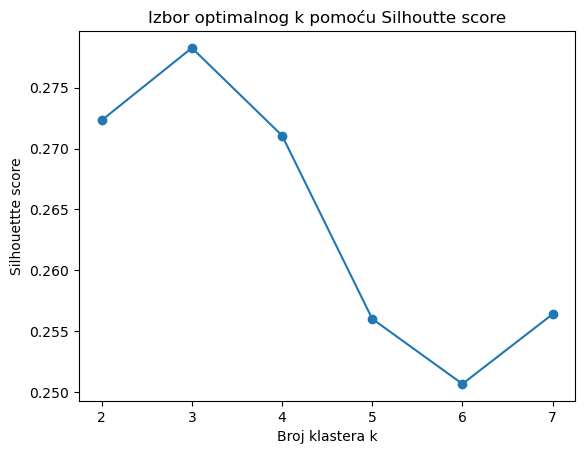

In [22]:
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker = 'o')
plt.xlabel("Broj klastera k")
plt.ylabel("Silhouettte score")
plt.title("Izbor optimalnog k pomoću Silhoutte score")
plt.show()

Silhoette score je izračunat za k od 2 do 7. Najviša vrednost za k = 3, pa je ovaj broj klastera izabran kao optimalan. Vrednost Silhoette score (~0.28) ukazuje na umereno razdvajanje klastera - klasteri su prepoznatljivi, ali ne potpuno separabilni, što je očekivano za realne podatke o kupcima.

In [23]:
customer_data.groupby("KMeans_Cluster").mean()

,customer_id,NumPurchases,TotalQuantity,TotalSpending,AvgReview,Age,Hier_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,
0,52777.251701,1.0,2.775510,596.107143,1.884354,45.517007,1.340136,2.306122
1,54572.104987,1.0,4.249344,1232.752992,4.313226,46.511811,0.729659,0.564304
2,57077.319915,1.0,1.949153,381.398814,4.390151,46.546610,0.036017,0.569915


Interpretacija K-Means klastera:
- Klaster 0 -> imereni kupci (srednja potrošnja, prosečne količine, srednja starost)
- Klaster 1 -> veći potrošači (najveća ukupna potrošnja i količina)
- Klaster 2 -> sporadični/niski potrošači (manj potrošnja, ali slična starost)

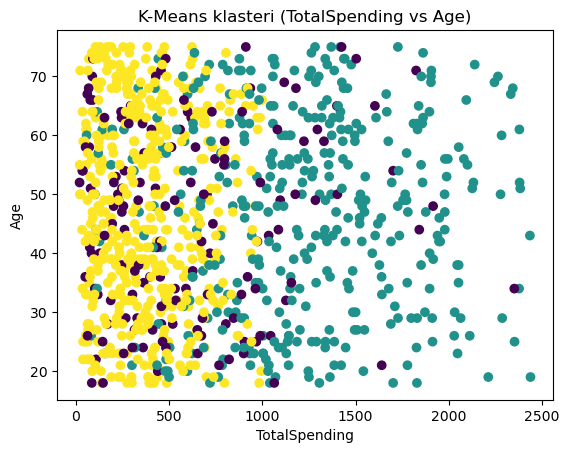

In [24]:
plt.scatter(customer_data["TotalSpending"], customer_data["Age"], c = customer_data["KMeans_Cluster"])
plt.xlabel("TotalSpending")
plt.ylabel("Age")
plt.title("K-Means klasteri (TotalSpending vs Age)")
plt.show()

Scatter plot pokazuje da se klasteri uglavnom raylikuju po ukupnoj potrošnji, dok starost ima manji uticaj na razdavajanje grupa.

### Hijerarhijska klasterizacija

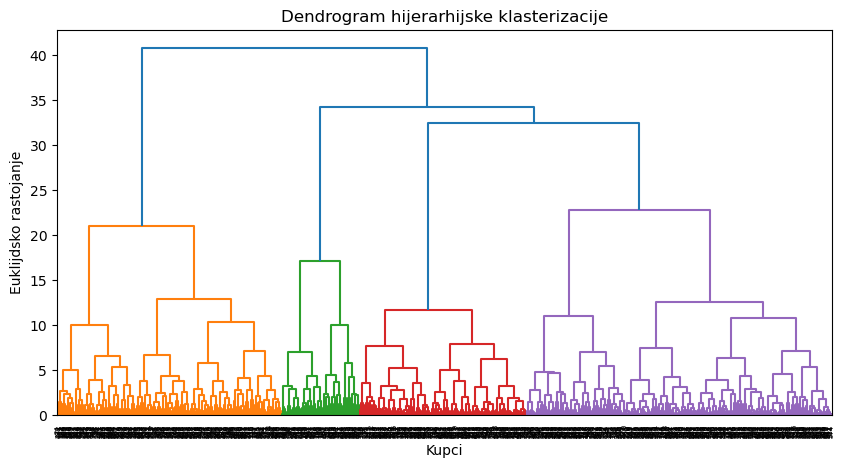

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method = 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram hijerarhijske klasterizacije")
plt.xlabel("Kupci")
plt.ylabel("Euklijdsko rastojanje")
plt.show()

Dendrogram pokazuje kako se kupci postepeno spajaju u veće klastere. Horizontalna linija na visini koja preseče tri vertikalne grane sugeriše izbor 3 klastera, što je u skladu sa K-Means rezulatatom.

In [25]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = best_k)
customer_data["Hier_Cluster"] = agg.fit_predict(X_scaled)

sil_hier = silhouette_score(X_scaled, customer_data["Hier_Cluster"])
print("Silhouette (Hierarchical):", sil_hier)

Silhouette (Hierarchical): 0.24398359256593177


Hijerarahijska klasterizacija sa 3 klastera daje Silhouette score ≈ 0.24, što je nesšto niže od K-Means rezulata (≈ 0.28). Ovo ukazuje da K-Means daje nešto bolje razdvajanje klastera na ovom skupu podataka.

In [28]:
customer_data_no_dbscan = customer_data.drop(columns=["DBSCAN_Cluster"])
customer_data_no_dbscan.groupby("Hier_Cluster").mean()

,customer_id,NumPurchases,TotalQuantity,TotalSpending,AvgReview,Age,KMeans_Cluster
Hier_Cluster,,,,,,,
0,56187.571429,1.0,2.328407,483.745452,4.295544,43.141215,1.678161
1,55385.410345,1.0,4.244828,1288.735138,4.229325,53.744828,1.013793
2,51591.316832,1.0,2.950495,683.096139,1.485149,44.782178,0.089109


Hijerarhijski klasteri su po strukturi slični K-Means klasterima, što ukazuje da je podela kupaca relativno stabilna bez obzira na izbor algoritama.

### DBSCAN

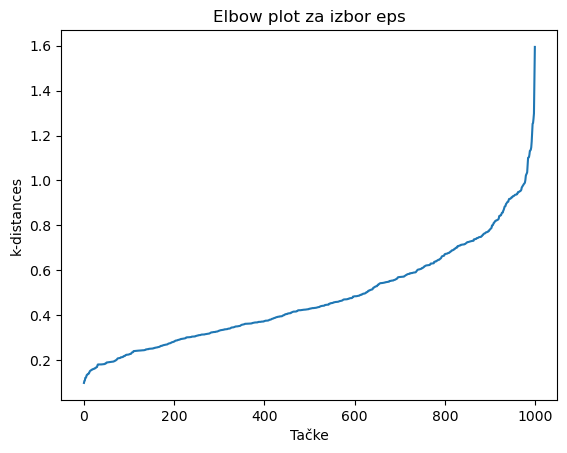

In [32]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
distances, indices = neighbors.fit(X_scaled).kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Tačke")
plt.ylabel("k-distances")
plt.title("Elbow plot za izbor eps")
plt.show()

Na osnovu k-distance grafa, prelom se nalazi oko eps ≈ 0.8, pa je ova vrednost izabrana za DBSCAN.

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.8, min_samples = 5)
customer_data["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(customer_data["DBSCAN_Cluster"])) - (1 if -1 in customer_data["DBSCAN_Cluster"].values else 0)
n_outliers = list(customer_data["DBSCAN_Cluster"]).count(-1)

print("Broj DBSCAN klastera", n_clusters)
print("Broj outliera", n_outliers)

Broj DBSCAN klastera 9
Broj outliera 56


DBSCAN je pronašao 9 klastera i identifikovao 56 outliera-a. Veliki broj malih klastera i značajan broj outler-a ukazuje da je struktura podataka kompleksna i da DBSACN deli kupce na finije grupe nego K-Means.

In [34]:
mask = customer_data["DBSCAN_Cluster"] != -1
sil_dbscan = silhouette_score(X_scaled[mask], customer_data["DBSCAN_Cluster"][mask])
print("Silhouette (DBSCAN):", sil_dbscan)

Silhouette (DBSCAN): 0.004114291655986099


Za razliku od K-Means i hijerarhijske klasterizacije, DBSCAN pronalazi veći broj manjih klasterai eksplicitno označava outliere, što može biti korsino za detekciju neobičnih kupaca.

In [36]:
customer_data["DBSCAN_Cluster"].value_counts()

DBSCAN_Cluster
 0    399
 1    382
 2     91
-1     56
 3     38
 7      8
 4      7
 5      7
 6      7
 8      5
Name: count, dtype: int64

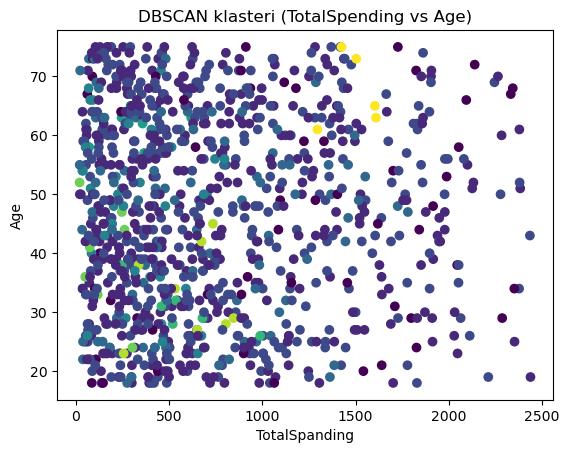

In [37]:
plt.scatter(customer_data["TotalSpending"], customer_data["Age"], c = customer_data["DBSCAN_Cluster"])
plt.xlabel("TotalSpanding")
plt.ylabel("Age")
plt.title("DBSCAN klasteri (TotalSpending vs Age)")
plt.show()

Silhouette score DBSCAN je veoma nizak (~0.004), što je očekivano jer DBSCAN proizvodi mnogo malih klastera i oulier-a. Za razliku od K-Means-a, cilj DBSCAN-a nije nužno maksimizacija Silhouette score-a, već otkrivanje gustih regiona i anomalija u podacima.

In [39]:
customer_data.groupby("DBSCAN_Cluster")[["TotalSpending", "TotalQuantity", "AvgReview", "Age"]].mean()

,TotalSpending,TotalQuantity,AvgReview,Age
DBSCAN_Cluster,,,,
-1,1156.836607,4.321429,1.946429,47.071429
0,724.201328,2.977444,3.996217,46.551378
1,762.373010,2.947644,5.000000,46.227749
2,666.410769,2.648352,3.000000,46.098901
3,335.189211,1.578947,1.000000,47.236842
4,256.217143,2.285714,2.000000,60.428571
5,547.198571,4.285714,2.000000,31.428571
6,154.144286,1.000000,2.000000,39.571429
7,605.007500,2.000000,2.000000,33.250000


Interpretacija najvećih DBSCAN klastera:
- Klaster 0 (najveći klaster) predstavlja tipične kupce sa umerenim trošenjem i prosečnim ocenama.
- Manji klasteri (1, 2, 3,...) često predstavljaju specifične grupe kupaca (npr.veliki potrošači, kupci sa vrlo niskim ocenama ili starosno specifične grupe)
- Klaster-1 (outlieri) sadrži netupične kupce koji se značajno razlikuju od većine (neobične kombinacije potršnje, količine ili ocena)

### Poređenje metoda

In [43]:
comparison = pd.DataFrame({
    "Method": ["KMeans", "Hierarchical", "DBSCAN"],
    "Num_Clusters": [best_k, best_k, n_clusters],
    "Silhouette_Score": [sil_scores[best_k], sil_hier, sil_dbscan],
    "Outliers": [0, 0, n_outliers]
})

print(comparison)

         Method  Num_Clusters  Silhouette_Score  Outliers
0        KMeans             3          0.278265         0
1  Hierarchical             3          0.243984         0
2        DBSCAN             9          0.004114        56


### Diskusija rezultata
Na osnovu dobijenih rezultata možemo zaključiti:
- **K-Means** daje stabilne klastere i obično visok Silhouette Score, ali ne detektuje outliere.
- **Hijerarhijska klasterizacija** daje slične rezultate kao K-Means i isti broj klastera, ali je računarski zahtevnija i daje nešto niži kvalitet razdvajanja..
- **DBSACN** uspešno pronalazi outliere i otkriva likalne obrasce u podacima, ali je veoma osetljiv na izbor parametara `eps` i `min_samples`, što utiče na broj i oblik klastera.

U sledećem koraku biće razmotrena **redukcija dimenzionalnosti pomoću PCA**, kako bi se dodatno pojednostavila struktura podataka i olakšala vizuelna interpretacija klastera.